Нейронные сети базируются на определенных алгоритмах и математических функциях. Сначала может казаться, что разобраться в них довольно сложно. Но существуют готовые библиотеки машинного обучения для построения и тренировки нейросетей, позволяющие не углубляться в их устройство.


### Задание

`
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork. Данные нейросети:
	три входа (x_1,x_2,x_3 );
	три нейрона в скрытых слоях (h_1,h_2,h_3);
	выход (o_1).
Нейроны имеют идентичные веса и пороги:
	w = [0.5,0.5,0.5]
	b = 0
Данные нейросети:
	два входа (x_1,x_2);
	два нейрона в скрытых слоях (h_1,h_2);
	два выхода (o_1,o_2 ).
Нейроны имеют идентичные веса и пороги:
	w = [1,0];
	b = 1.
`

In [ ]:
import numpy as np
class OurNeuralNetwork:

    def __init__(self):
        weights = np.array([0.5,0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.h3 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1
network = OurNeuralNetwork()
x = np.array([2,3,4])
print(network.feedforward(x))


0.8151036049051821


### Задание:

Реализуйте классы нейронных сетей с использованием других функций активации.

<div align="сenter">
<img src="https://sun1.userapi.com/sun1-21/s/v1/if2/JMA4e7_VY474gCimZqC7lhi0KEc60PwPyruh0FnYrFWaVLB-1HpC9uc1-4RKPMAgaivt3cJyxGT9sJUY-A8x52dW.jpg?size=549x576&quality=96&type=album" align="сenter" style="width:40%"
</div>


In [ ]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self,weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self,inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9990889488055994


In [ ]:
import numpy as np
def tanh(x):
    return np.tanh(x)
class Neuron:
    def __init__(self,weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self,inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)
weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9999983369439447


In [ ]:
import numpy as np
def ReLu(x):
    return max(0,x)
class Neuron:
    def __init__(self,weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self,inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLu(total)
weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))


7


### 1.2.1 Задание
Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.

Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

In [ ]:
from sklearn.datasets import load_iris

digits = load_iris()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Sizes: ', X_digits.shape, Y_digits.shape)


Dataset Sizes:  (150, 4) (150,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes:  (120, 4) (30, 4) (120,) (30,)


In [ ]:
# Для начала натренируем модель MLPClassifier с параметрами по умолчанию
# для тренировочных данных.

from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=123)

In [ ]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])
# метод score для оценки точноси моделей классификации
print('Test Accuracy: %.3f'%mlp_classifier.score(X_test, Y_test))

print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train))

[1 0 2 2 0 0 2 2 2 0 0 1 2 1 2]
[1 0 2 2 0 0 2 1 2 0 0 1 2 1 2]
Test Accuracy: 0.933
Training Accuracy: 0.983


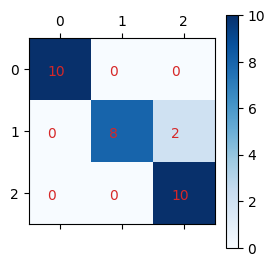

In [ ]:
# Cоздадим метод plot_confusion_matrix(), который принимает исходные и
# предсказанные метки данных по модели. Затем он строит матрицу путаницы,
# используя matplotlib

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(3,3))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar();
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2, j+0.1, str(conf_mat[j, i]), color='tab:red')

plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

### Регрессия

In [ ]:
url=r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
salary = pd.read_csv(url)

X_salary = salary.iloc[:, :-1].values
Y_salary = salary.iloc[:, 1].values
print('"salary" Dataset Sizes:',X_salary.shape, Y_salary.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_salary, Y_salary, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes : ', X_train.shape, X_test. shape, Y_train.shape, Y_test.shape)

mlp_regressor = MLPRegressor(random_state=123, max_iter=50000)
mlp_regressor.fit(X_train, Y_train)

Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
print('Test R*2 Score : %.3f'%mlp_regressor.score(X_test, Y_test))
print('Training R*2 Score : %.3f'%mlp_regressor.score(X_train, Y_train))

"salary" Dataset Sizes: (30, 1) (30,)
Train/Test Sizes :  (24, 1) (6, 1) (24,) (6,)
[ 55265.2045971  126554.5591937   52335.80522199 116782.59147446
  55265.2045971  117759.05793283]
[ 54445. 121872.  56642. 116969.  64445. 112635.]
Test R*2 Score : 0.971
Training R*2 Score : 0.948


In [ ]:
print("Loss :", mlp_regressor.loss_)
print("Number of Coefs : ", len(mlp_regressor.coefs_))
print("Number of Iterations for Which Estimator Ran :", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Function :",mlp_regressor.out_activation_)

Loss : 16873681.689960103
Number of Coefs :  2
Number of Iterations for Which Estimator Ran : 30344
Name of Output Layer Activation Function : identity
